<a href="https://colab.research.google.com/github/ChandiniKS/covid-19-data-analysis-/blob/main/covid_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries for web scrapping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
#data collected from PSR INDIA ORGANISATION

In [9]:
url='https://prsindia.org/covid-19/cases'

In [10]:
r =requests.get(url)

In [11]:
print(r)

<Response [200]>


In [12]:
soup=BeautifulSoup(r.text,'lxml')

In [13]:
table= soup.find('table', class_='table table-striped table-bordered')

In [14]:
headers = table.find_all('th')

In [15]:
titles=[]
for i in headers:
  title= i.text
  titles.append(title)
print(titles)

['#', 'State/UT', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged', 'Death']


In [16]:
print(headers)

[<th>#</th>, <th>State/UT</th>, <th style="width: 11%; text-align:right">Confirmed Cases</th>, <th style="width: 9%; text-align:right">Active Cases</th>, <th style="width: 2%; text-align:right">Cured/Discharged</th>, <th style="width: 5%; text-align:right">Death</th>]


In [17]:
df=pd.DataFrame(columns=titles)

In [18]:
print(df)

Empty DataFrame
Columns: [#, State/UT, Confirmed Cases, Active Cases, Cured/Discharged, Death]
Index: []


In [19]:
rows = table.find_all('tr')

In [20]:
for i in rows[1:]:
  data=i.find_all('td')
  #print(data)
  row=[tr.text for tr in data]
  l= len(df)
  df.loc[l]= row
print(df)

     #                                  State/UT Confirmed Cases Active Cases  \
0                                          India        43452164       104555   
1    1               Andaman and Nicobar Islands           10157           42   
2    2                            Andhra Pradesh         2321379          755   
3    3                         Arunachal Pradesh           64518            4   
4    4                                     Assam          724788          395   
5    5                                     Bihar          832581          934   
6    6                                Chandigarh           93785          568   
7    7                              Chhattisgarh         1154179          861   
8    8  Dadra and Nagar Haveli and Daman and Diu           11474           14   
9    9                                     Delhi         1934009         4325   
10  10                                       Goa          248540          982   
11  11                      

In [21]:
print(df)

     #                                  State/UT Confirmed Cases Active Cases  \
0                                          India        43452164       104555   
1    1               Andaman and Nicobar Islands           10157           42   
2    2                            Andhra Pradesh         2321379          755   
3    3                         Arunachal Pradesh           64518            4   
4    4                                     Assam          724788          395   
5    5                                     Bihar          832581          934   
6    6                                Chandigarh           93785          568   
7    7                              Chhattisgarh         1154179          861   
8    8  Dadra and Nagar Haveli and Daman and Diu           11474           14   
9    9                                     Delhi         1934009         4325   
10  10                                       Goa          248540          982   
11  11                      

In [22]:
df.to_csv('covid cases.csv')

In [ ]:
# column '#' from data set was removed using excel and data again data has been uploaded.

In [23]:
data=pd.read_csv('/content/covid cases.csv')

In [24]:
data.head(10)

,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,Andaman and Nicobar Islands,10157,42,9986,129
1,Andhra Pradesh,2321379,755,2305893,14731
2,Arunachal Pradesh,64518,4,64218,296
3,Assam,724788,395,716405,7988
4,Bihar,832581,934,819388,12259
5,Chandigarh,93785,568,92052,1165
6,Chhattisgarh,1154179,861,1139282,14036
7,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
8,Delhi,1934009,4325,1903423,26261
9,Goa,248540,982,243720,3838


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State/UT          36 non-null     object
 1   Confirmed Cases   36 non-null     int64 
 2   Active Cases      36 non-null     int64 
 3   Cured/Discharged  36 non-null     int64 
 4   Death             36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [ ]:
#importing libraries for visualisation

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

In [ ]:
# box plot to show statewise death due to COVID 19

<Axes: xlabel='State/UT', ylabel='Death'>

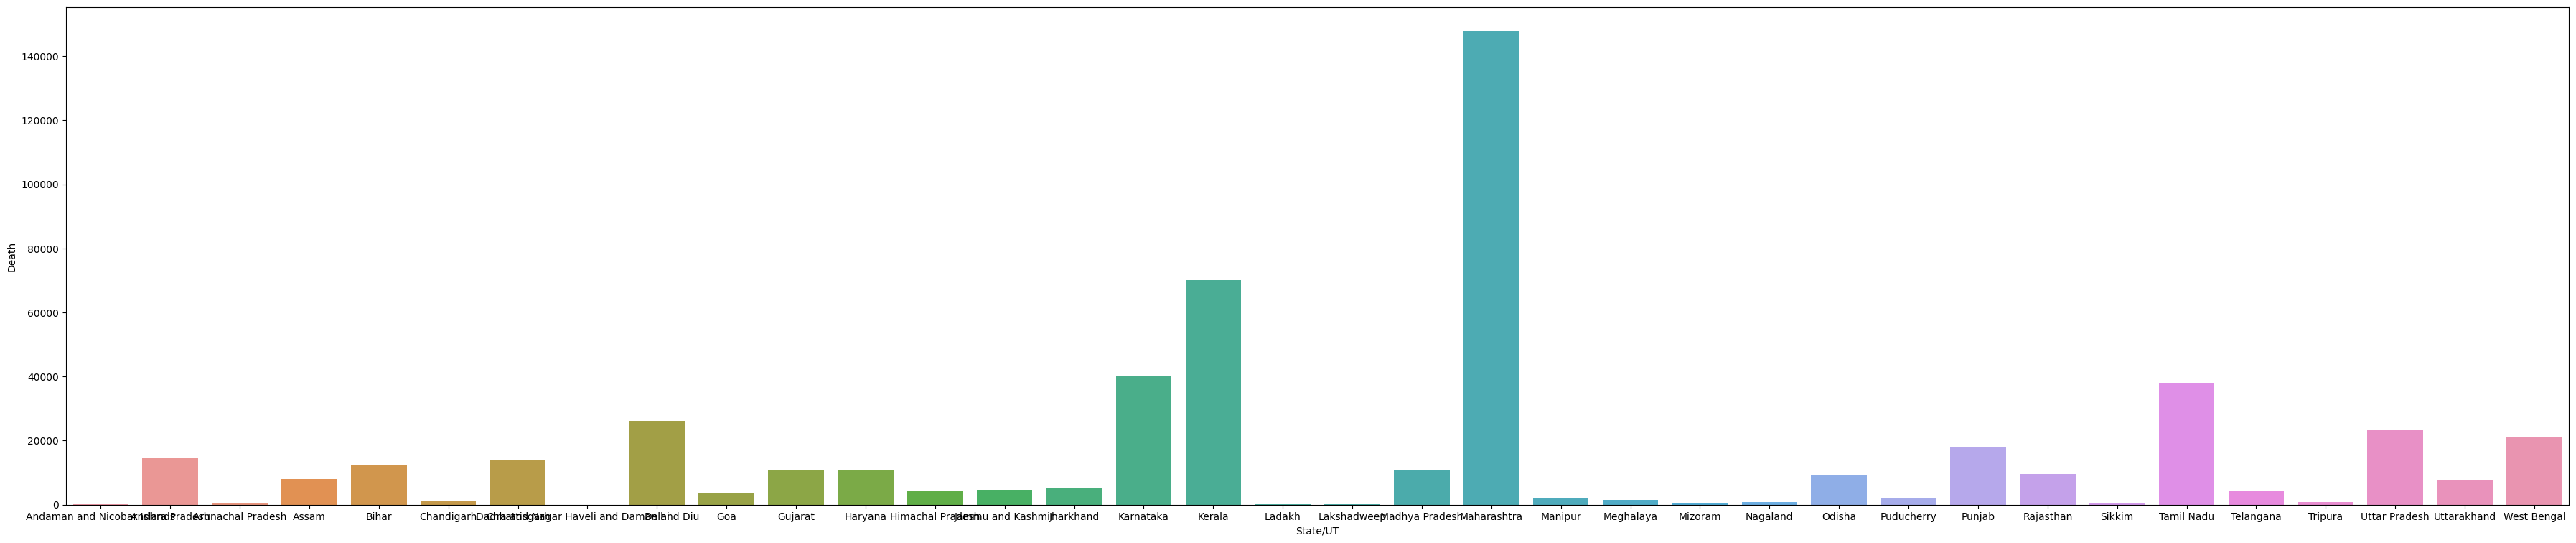

In [41]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Death')

In [ ]:
# box plot to show statewise  confirmed COVID 19 cases

<Axes: xlabel='State/UT', ylabel='Confirmed Cases'>

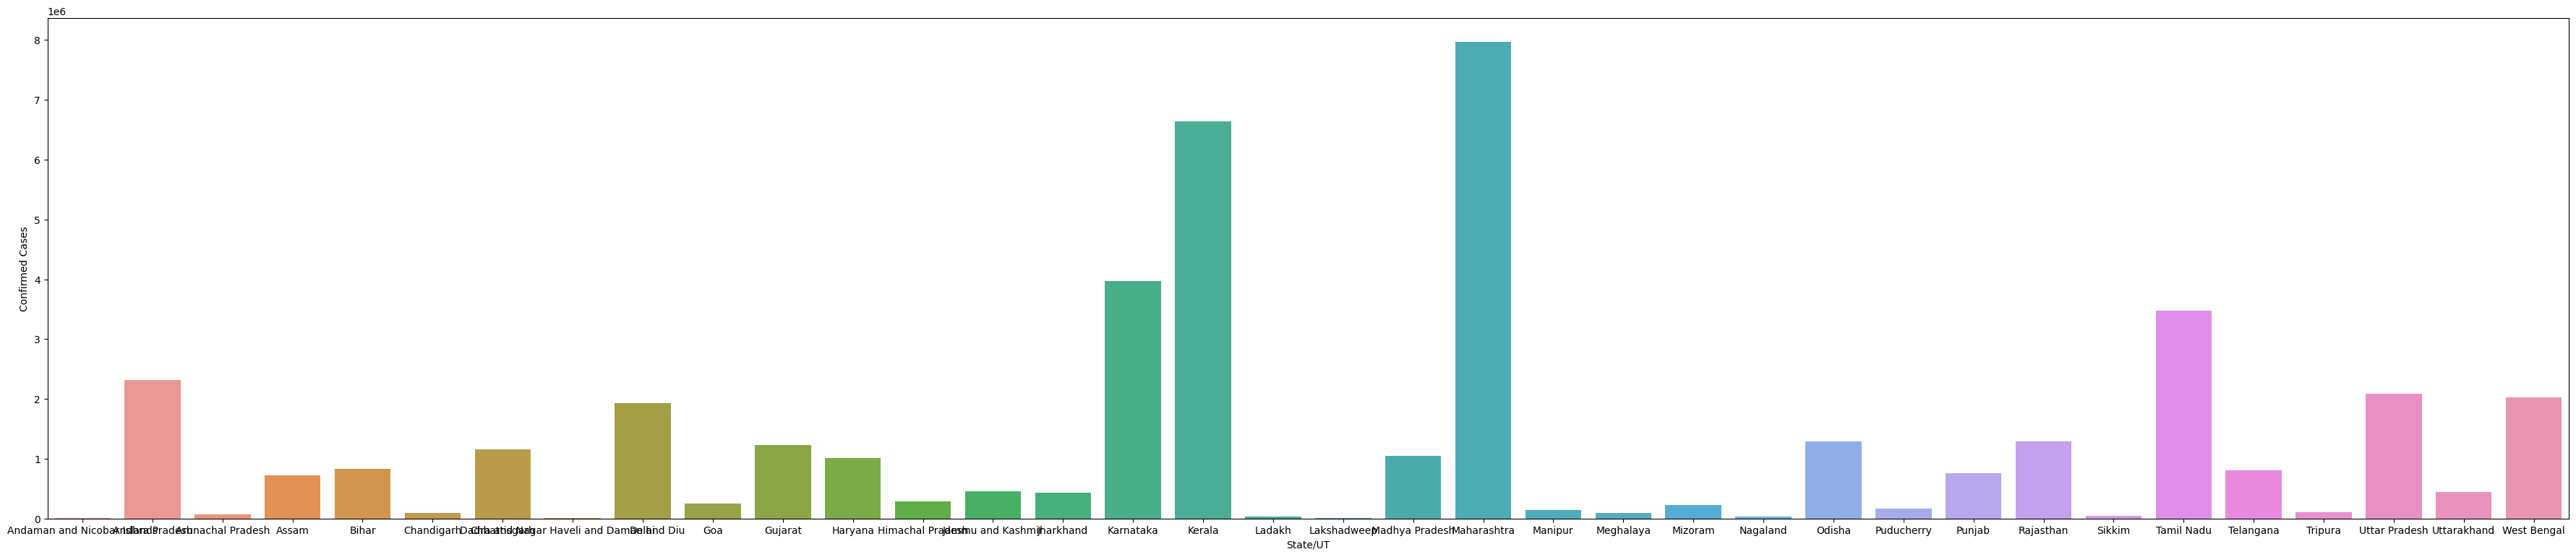

In [45]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Confirmed Cases')

In [ ]:
# box plot to show statewise count of people cured from covid

<Axes: xlabel='State/UT', ylabel='Cured/Discharged'>

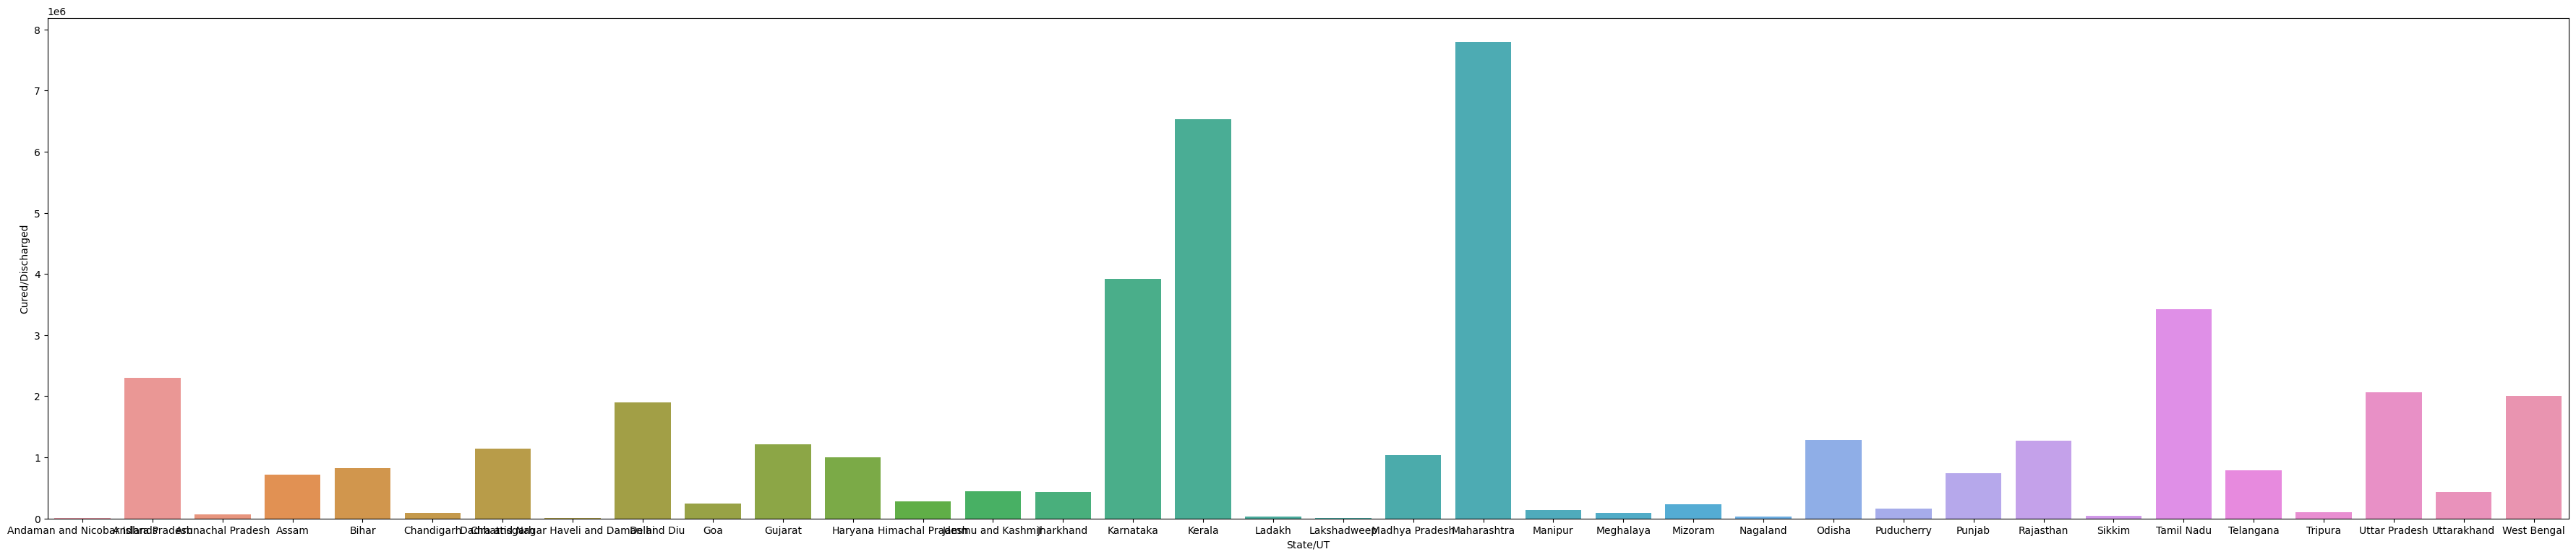

In [46]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Cured/Discharged')

In [ ]:
# box plot to show statewise active cases

<Axes: xlabel='State/UT', ylabel='Active Cases'>

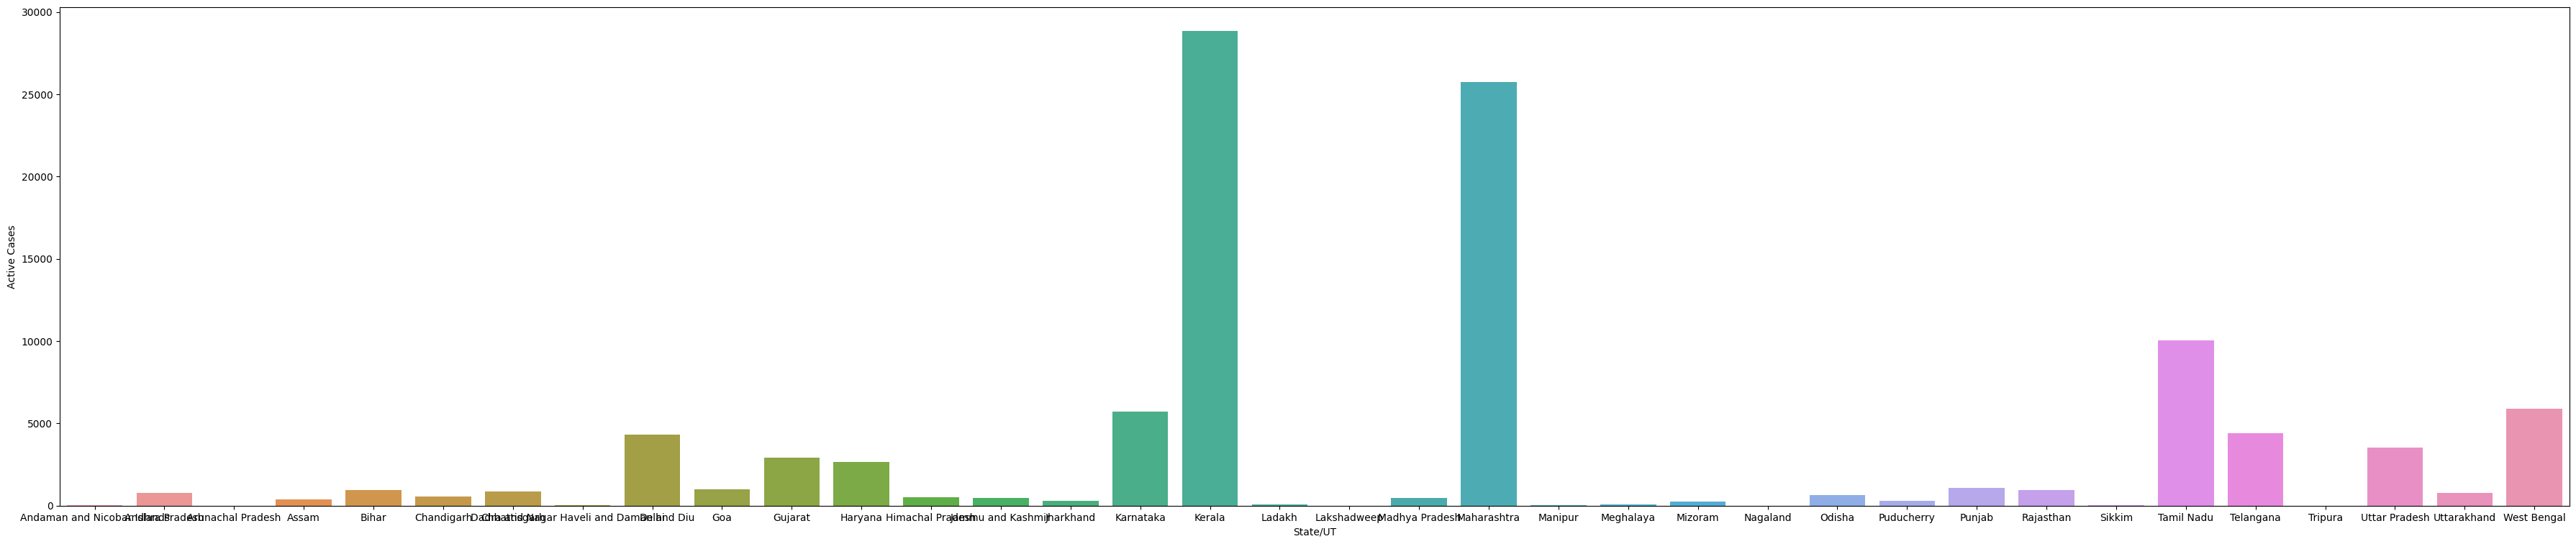

In [47]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Active Cases')

In [48]:
statewise=pd.pivot_table(data,values=['Confirmed Cases','Cured/Discharged','Death'],index='State/UT',aggfunc=max)

In [49]:
statewise= statewise.sort_values(by='Confirmed Cases', ascending=False)

In [ ]:
#graph in decending order of confirmed cases statewise

In [50]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed Cases,Cured/Discharged,Death
State/UT,,,
Maharashtra,7972474,7798817,147922
Kerala,6634722,6535869,69993
Karnataka,3968365,3922541,40117
Tamil Nadu,3473116,3425057,38026
Andhra Pradesh,2321379,2305893,14731
Uttar Pradesh,2090050,2062971,23538
West Bengal,2027901,2000798,21218
Delhi,1934009,1903423,26261
Odisha,1289602,1279849,9126


In [87]:
#pie chart to show confirmed cases, discharged cases, death in top 10 states in corona outbreak(as per confirmed cases data)

array([<Axes: ylabel='Confirmed Cases'>,
       <Axes: ylabel='Cured/Discharged'>, <Axes: ylabel='Death'>],
      dtype=object)

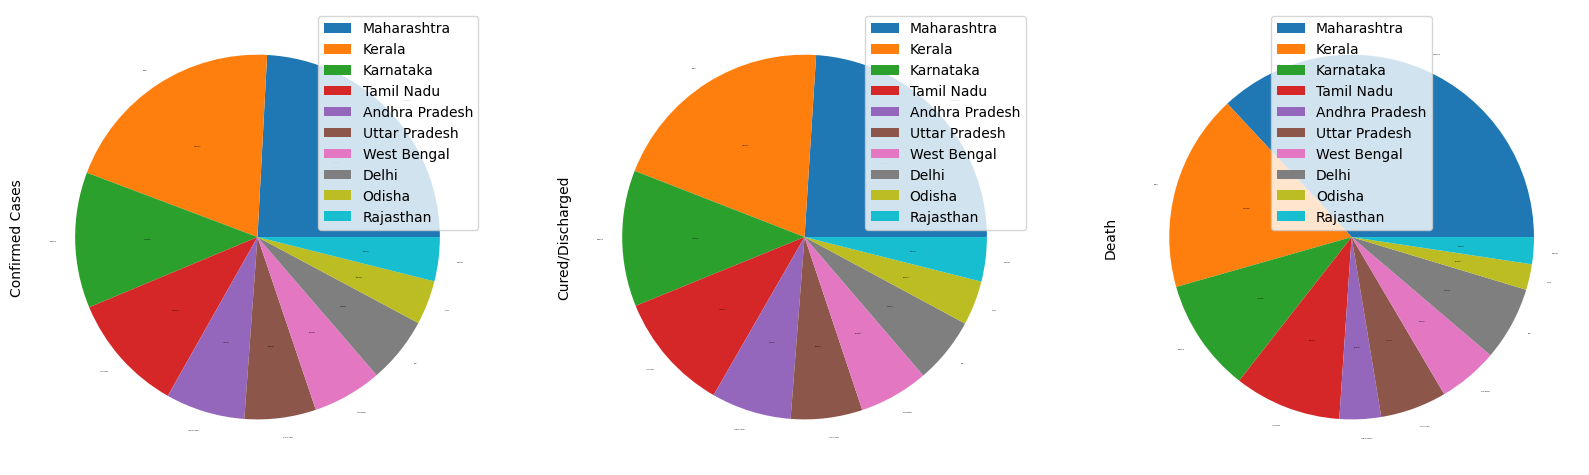

In [88]:
statewise.iloc[0:10].plot.pie(subplots=True,figsize=(20,20),fontsize=0.2,autopct='%1f')

In [89]:
confirmed=data['Confirmed Cases']

In [90]:
state=data['State/UT']

In [ ]:
# pie chart to compare the percentage of confirmed cases of corona in differet state

([<matplotlib.patches.Wedge at 0x7f71f8dc5c00>,
 [Text(-0.0008077864298045521, 1.0999997034004527, 'Andaman and Nicobar Islands'),
  Text(-0.18534648724244768, 1.0842724194900861, 'Andhra Pradesh'),
  Text(-0.3687069332427444, 1.0363663432294252, 'Arunachal Pradesh'),
  Text(-0.4272167901819295, 1.013649749265815, 'Assam'),
  Text(-0.5384051987198567, 0.9592287745847868, 'Bihar'),
  Text(-0.6013956128197679, 0.9210446877764052, 'Chandigarh'),
  Text(-0.6819404281432228, 0.863109061743554, 'Chhattisgarh'),
  Text(-0.7521740439174067, 0.802642017126524, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(-0.8572719865142545, 0.6892639125457707, 'Delhi'),
  Text(-0.9549348345225219, 0.5459848549322992, 'Goa'),
  Text(-1.0077850054543143, 0.4408734317028505, 'Gujarat'),
  Text(-1.0658237015368723, 0.2720658693078575, 'Haryana'),
  Text(-1.0866724886620387, 0.1707129238957949, 'Himachal Pradesh'),
  Text(-1.0942553719549823, 0.11227279700650322, 'Jammu and Kashmir'),
  Text(-1.0992127869368

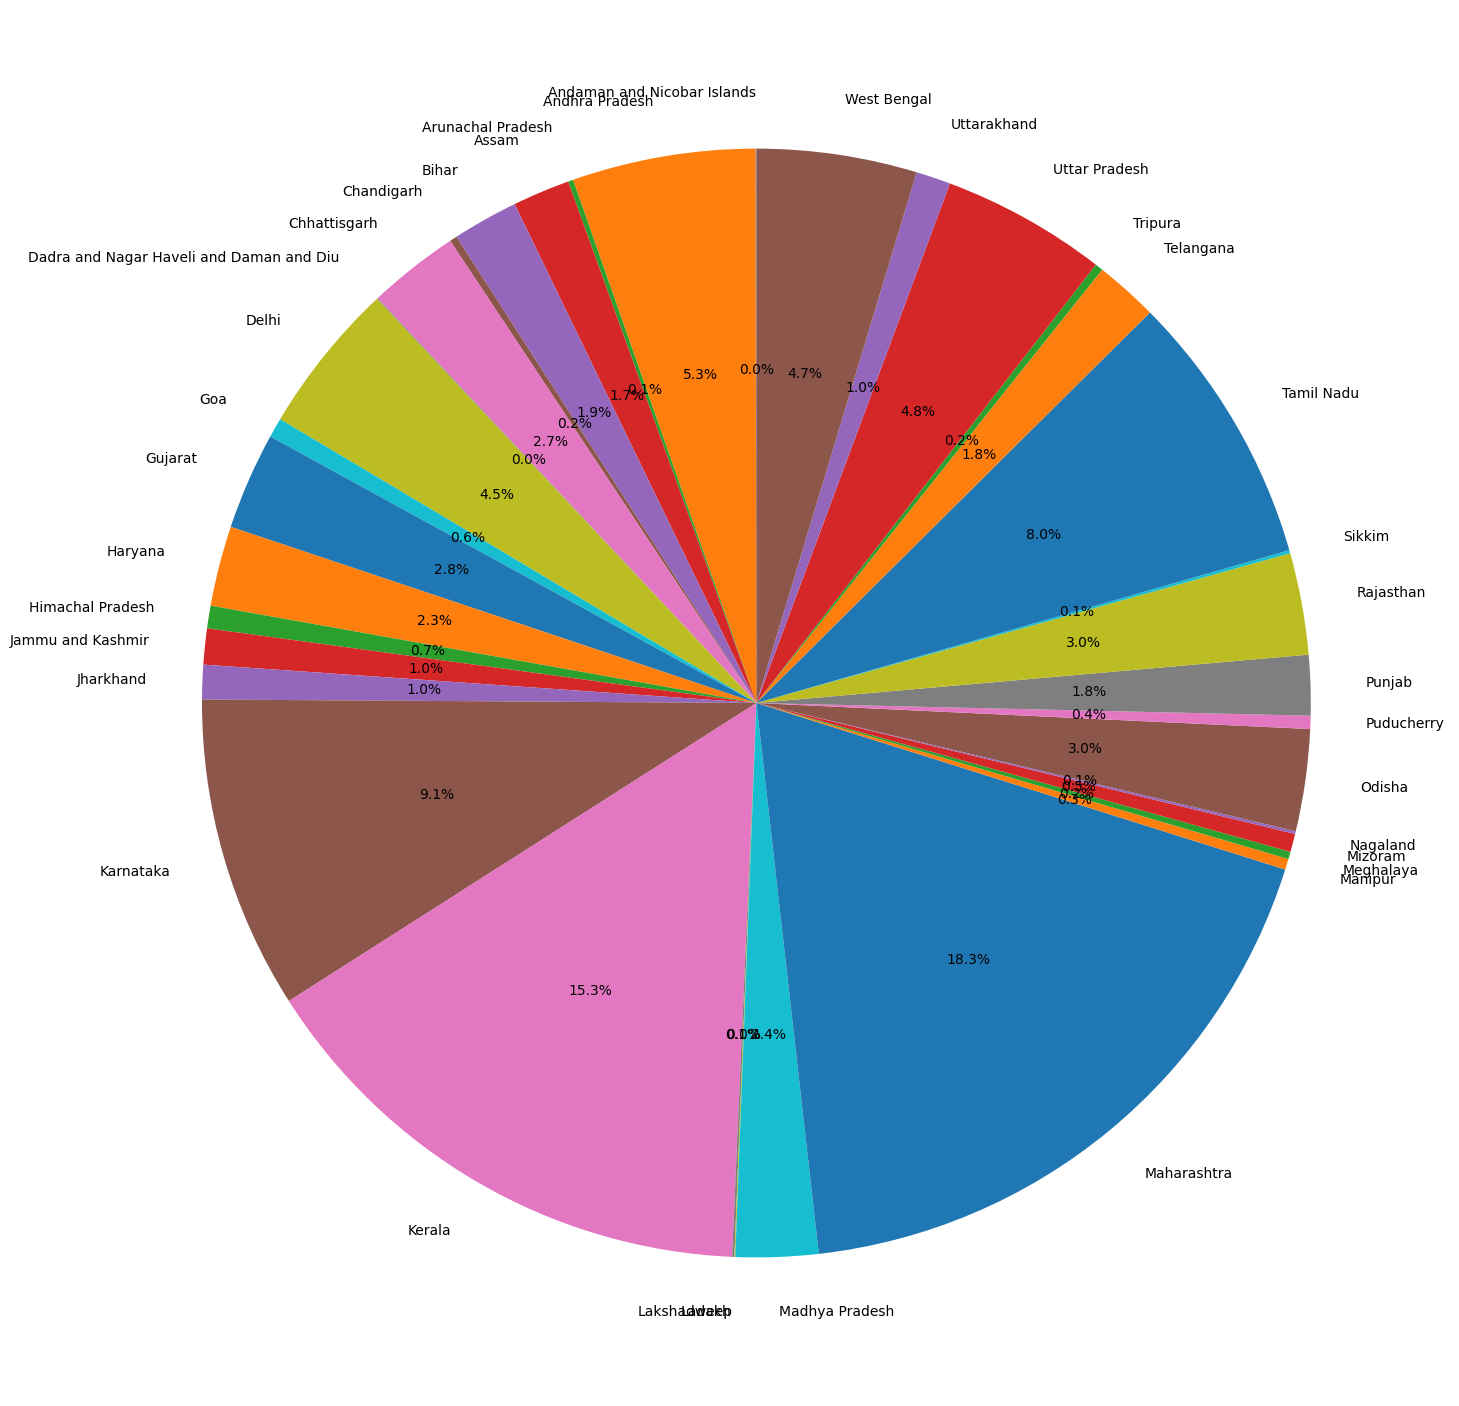

In [91]:
plt.figure(figsize=(20, 18))
plt.pie(confirmed, labels=state, autopct='%1.1f%%', startangle=90)

In [59]:
Active=data['Active Cases']

In [60]:
state=data['State/UT']

In [ ]:
 #pie chart to compare the percentage of active cases of corona in differet state

([<matplotlib.patches.Wedge at 0x7f71fa810640>,
 [Text(-0.0013881836355351422, 1.0999991240661031, 'Andaman and Nicobar Islands'),
  Text(-0.02772769155183175, 1.0996504786163677, 'Andhra Pradesh'),
  Text(-0.05279680487512791, 1.098732222789055, 'Arunachal Pradesh'),
  Text(-0.06596524378357854, 1.098020303369921, 'Assam'),
  Text(-0.10974805587801939, 1.0945114728640333, 'Bihar'),
  Text(-0.1590159415917643, 1.08844564876694, 'Chandigarh'),
  Text(-0.2055902153707525, 1.080616797640962, 'Chhattisgarh'),
  Text(-0.23392678090940366, 1.0748387140279998, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(-0.3716770621458637, 1.0353048640253846, 'Delhi'),
  Text(-0.5313534694950325, 0.963152890488105, 'Goa'),
  Text(-0.6402101390519749, 0.8945004068501317, 'Gujarat'),
  Text(-0.7802500904626224, 0.7753771961652404, 'Haryana'),
  Text(-0.8502885579070535, 0.697860565078973, 'Himachal Pradesh'),
  Text(-0.8699407483820171, 0.6732036053858714, 'Jammu and Kashmir'),
  Text(-0.88451633902807

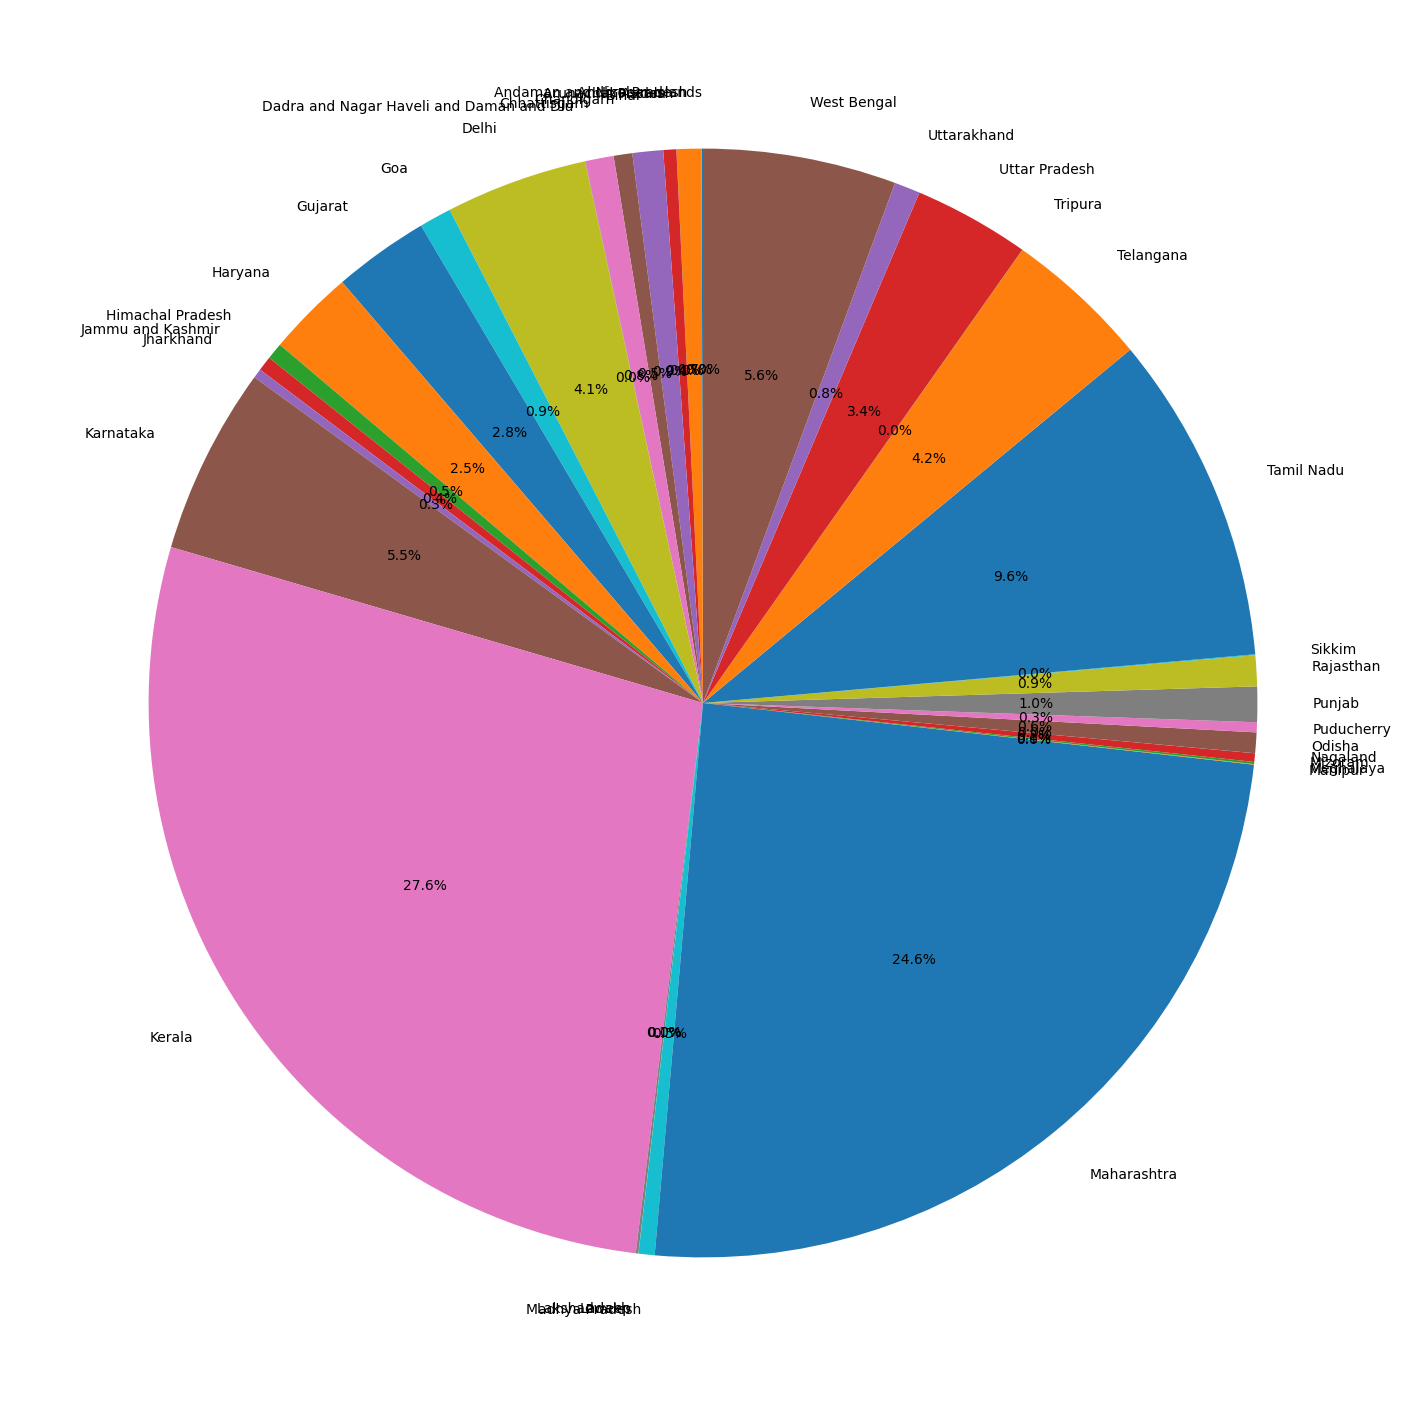

In [61]:
plt.figure(figsize=(20, 18))
plt.pie(Active, labels=state, autopct='%1.1f%%', startangle=90)

In [63]:
Death=data['Death']
state=data['State/UT']

In [ ]:
 #pie chart to compare the percentage of death due to corona in differet state

([<matplotlib.patches.Wedge at 0x7f71fa4a7130>,
 [Text(-0.0008489399997734846, 1.0999996724094407, 'Andaman and Nicobar Islands'),
  Text(-0.09850941887400129, 1.0955801633806204, 'Andhra Pradesh'),
  Text(-0.19647326849775454, 1.0823115331390538, 'Arunachal Pradesh'),
  Text(-0.24984985258981782, 1.0712492945905945, 'Assam'),
  Text(-0.377463510643838, 1.0332092228258656, 'Bihar'),
  Text(-0.4591360496732041, 0.9995969627257203, 'Chandigarh'),
  Text(-0.5480192775842668, 0.9537687724999275, 'Chhattisgarh'),
  Text(-0.6261063242823541, 0.9044284773787475, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(-0.7599254767300928, 0.7953070286477677, 'Delhi'),
  Text(-0.8900780384494151, 0.6463444015925577, 'Goa'),
  Text(-0.9436919399794096, 0.565195118890723, 'Gujarat'),
  Text(-1.0085791815077132, 0.4390535669246196, 'Haryana'),
  Text(-1.043379773569535, 0.34836568158471976, 'Himachal Pradesh'),
  Text(-1.0604360454195356, 0.2923617512175233, 'Jammu and Kashmir'),
  Text(-1.07612318406

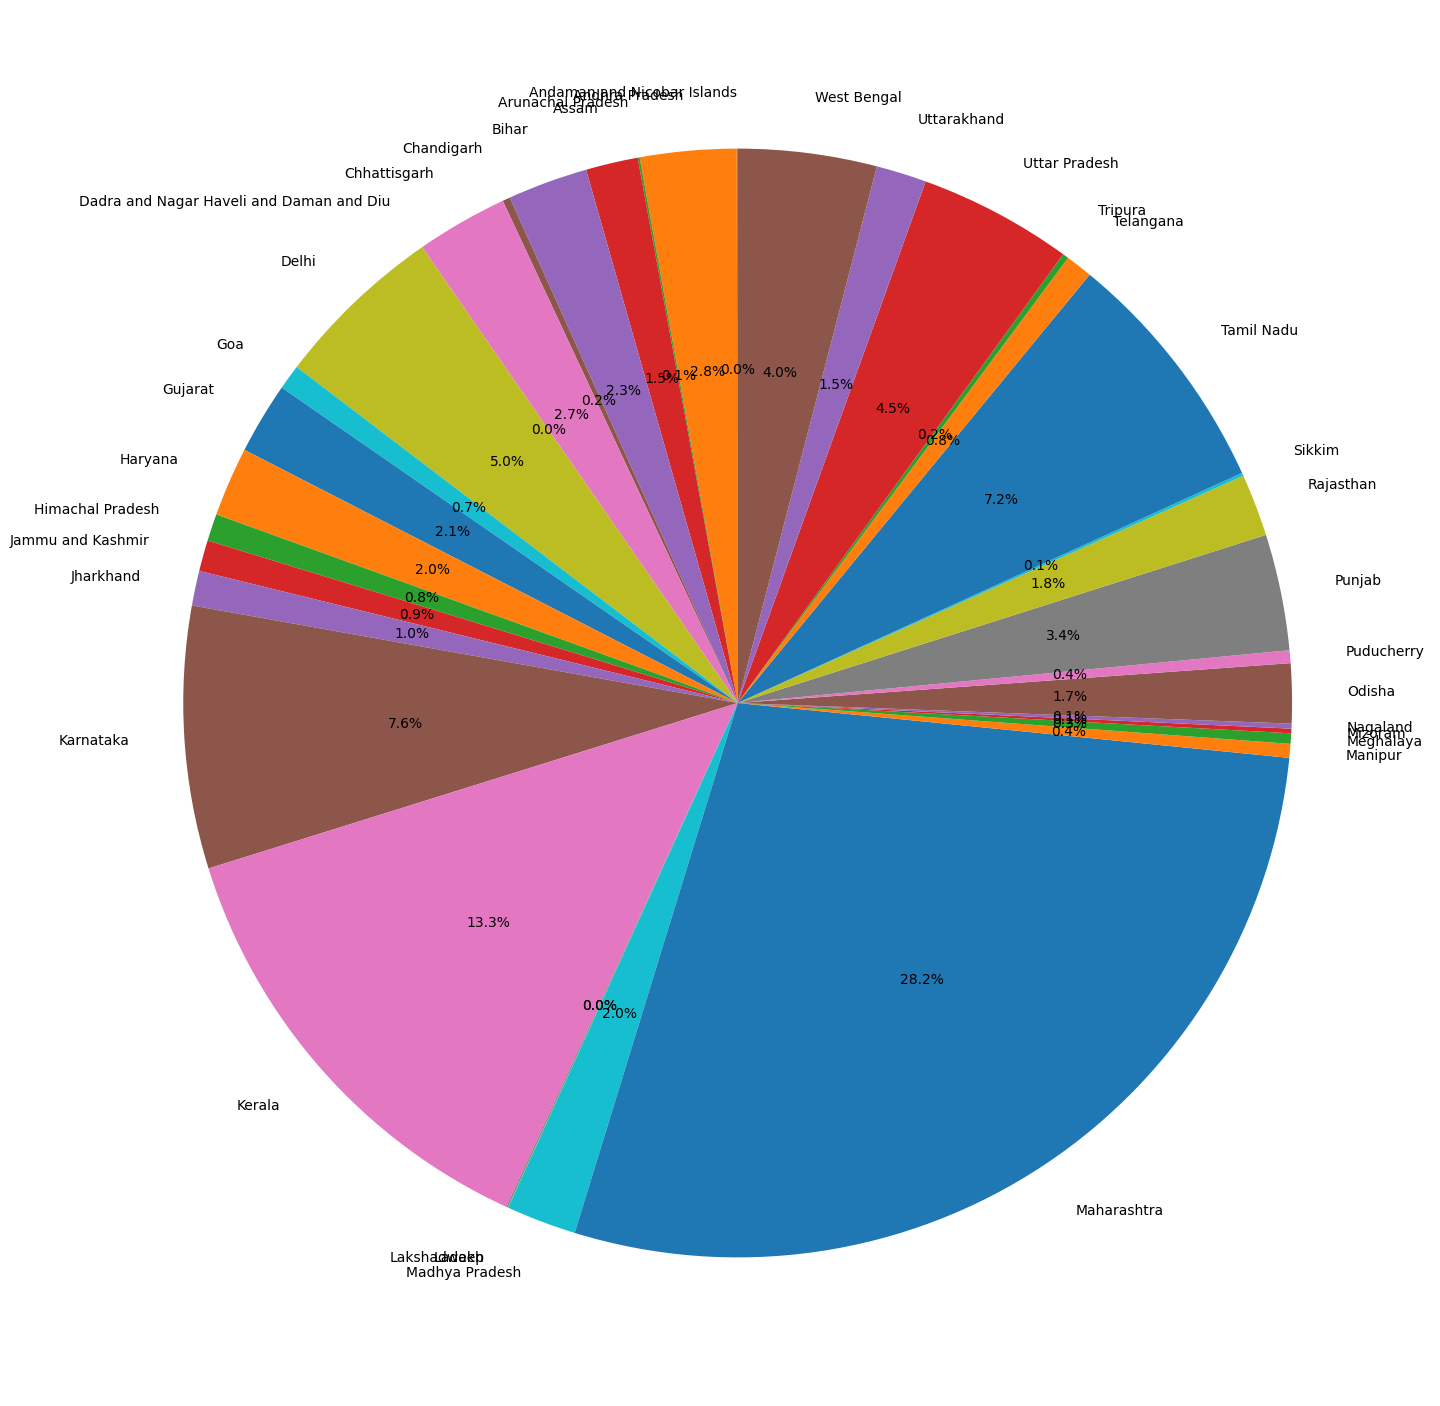

In [65]:
plt.figure(figsize=(20, 18))
plt.pie(Death, labels=state, autopct='%1.1f%%', startangle=90)

In [ ]:
#scatter plot of confirmed cases v/s active cases

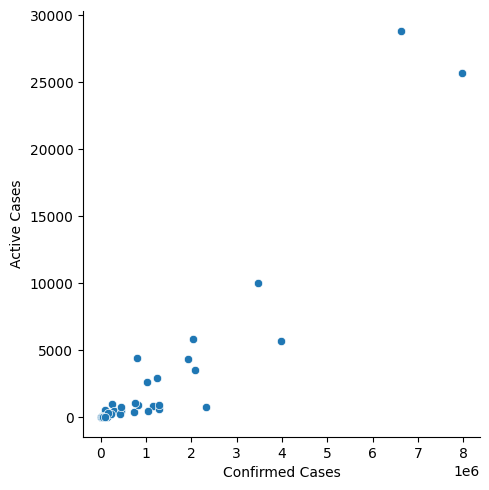

In [69]:
sns.relplot(x='Confirmed Cases',y='Active Cases',data=data)

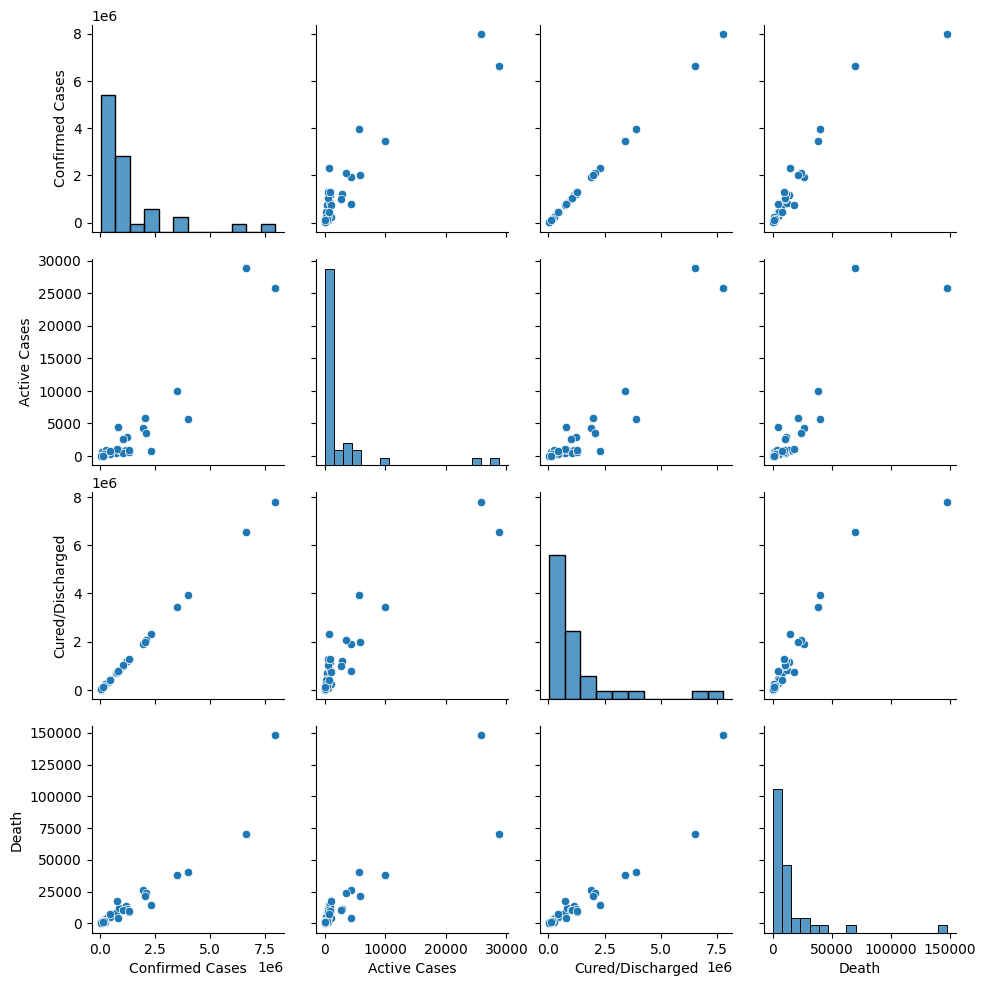

In [70]:
sns.pairplot(data)